# Project 9 - Partial Correlations & Directed Acyclic Graphs

## Generating Artificial Data

In [1]:
import random
import numpy as np
import pandas as pd

In [2]:
length = 100000
cols = ["P", "Q", "X", "Y", "Z"]
mu = 0
sigma = 5


lst_dct = {col:[] for col in cols}
for i in range(length):
    lst_dct["P"].append(25 + np.random.normal(mu, .5 * sigma))
    lst_dct["Q"].append(50 + np.random.normal(mu, sigma))
    lst_dct["X"].append(3 * lst_dct["Q"][-1]  + np.random.normal(mu, sigma ))
    lst_dct["Y"].append(lst_dct["Q"][-1] * -1 +  np.random.normal(mu, sigma))
    lst_dct["Z"].append(
        lst_dct["P"][-1] * 2 +  1.5 * lst_dct["X"][-1] -  lst_dct["Y"][-1] * 2 +  np.random.normal(mu,  sigma))

lst_dct

{'P': [26.513249217304505,
  22.77701397629534,
  23.972359005377363,
  26.937672281413608,
  23.670115239310686,
  21.76789213483947,
  25.67077972168021,
  27.473096193514078,
  21.36794894861606,
  23.40365049040301,
  23.15371727208287,
  27.823825037815325,
  27.263637347844995,
  23.27953500336159,
  20.28130407676848,
  26.50018963495027,
  18.880496575456593,
  25.965044650344886,
  28.53968149461692,
  21.490615803319688,
  20.141113643982944,
  27.199331860917187,
  27.539445829655097,
  27.931288812605292,
  23.39237876282307,
  26.66908208294497,
  24.480993722921752,
  27.84119179235624,
  23.3076353085559,
  26.478111335282314,
  26.134410952291006,
  21.653034802921407,
  29.05342251740533,
  20.923894884871544,
  24.501098260216526,
  25.543379043658017,
  23.07291723656238,
  23.64218310184121,
  25.53083839404754,
  23.234066400631896,
  26.503056384356505,
  23.923078448340693,
  22.423578888239753,
  28.381624189566242,
  23.680742529764487,
  30.25701871788166,
  2

In [3]:
df = pd.DataFrame(lst_dct)
df

,P,Q,X,Y,Z
0,26.513249,48.603702,141.545893,-44.963774,352.667503
1,22.777014,46.205239,137.383846,-40.897406,333.637146
2,23.972359,50.816682,158.062796,-44.592972,369.115672
3,26.937672,45.400673,136.779192,-44.996066,354.198537
4,23.670115,47.728620,134.285510,-44.774589,334.710253
...,...,...,...,...,...
99995,26.246284,46.206873,138.434456,-54.437363,376.014411
99996,24.895428,38.042251,110.906196,-38.443685,292.221469
99997,25.642890,52.469990,158.911183,-51.242148,392.610694
99998,25.295384,37.733548,109.795381,-34.539761,283.899509


<AxesSubplot:xlabel='X', ylabel='Z'>

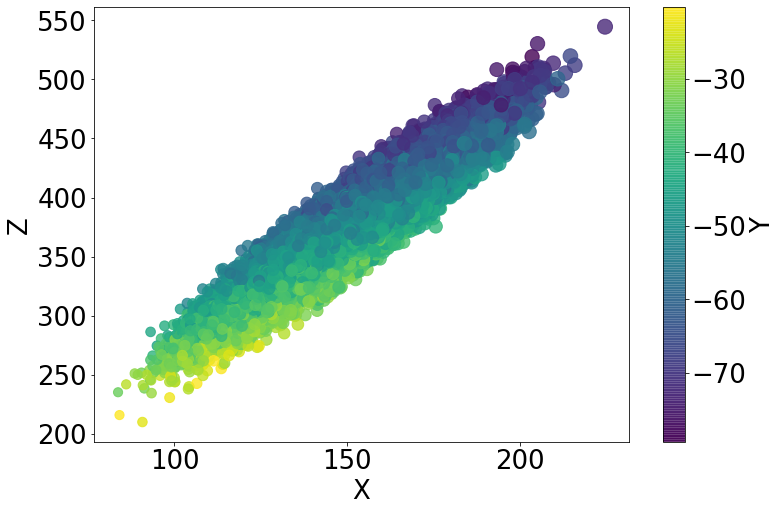

In [4]:
import matplotlib.pyplot as plt
#4D Visualization
#2D in x-y space, 3rd D: size and 4th D: color
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
df.plot.scatter(x = "X", y = "Z", c = "Y",s = "X", cmap = "viridis",alpha = .8, ax = ax)

In [5]:
df.corr()

,P,Q,X,Y,Z
P,1.000000,0.005613,0.006458,-0.008409,0.147324
Q,0.005613,1.000000,0.948543,-0.705960,0.913726
X,0.006458,0.948543,1.000000,-0.670349,0.934219
Y,-0.008409,-0.705960,-0.670349,1.000000,-0.846267
Z,0.147324,0.913726,0.934219,-0.846267,1.000000


In [6]:
import statsmodels.api as sm

residuals = {}
for y_var in df.keys():
    X_vars = list(df.keys())
    X_vars.remove(y_var)
    X = df [X_vars]
    X["Constant"] = 1
    y = df[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)
residuals

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 2.461e+04
Date:                Thu, 04 Nov 2021   Prob (F-statistic):               0.00
Time:                        10:21:23   Log-Likelihood:            -1.9888e+05
No. Observations:              100000   AIC:                         3.978e+05
Df Residuals:                   99995   BIC:                         3.978e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Q              0.0028      0.004      0.744      0.4

,P,Q,X,Y,Z
0,1.400204,1.362600,-0.131321,-0.293258,-2.551750
1,-1.173512,0.464857,-0.479737,1.146330,0.239512
2,0.745583,-0.911926,4.079043,-0.797937,-5.100333
3,-0.310989,-0.524849,-2.211987,2.151813,5.170072
4,0.220026,2.479266,-1.086182,-0.838197,-3.550438
...,...,...,...,...,...
99995,-1.115935,-1.018482,-3.272345,1.142572,6.949509
99996,0.159883,-0.244301,-0.619083,-0.402155,-0.811912
99997,0.192731,-0.074102,0.238977,0.438652,0.482167
99998,0.273761,0.103415,-0.847306,0.464649,-0.434190


In [7]:
residuals.corr()[residuals.corr().abs() < 1].mul(-1).fillna(1).round(2)

,P,Q,X,Y,Z
P,1.00,0.00,-0.59,0.63,0.70
Q,0.00,1.00,0.51,-0.14,-0.01
X,-0.59,0.51,1.00,0.74,0.83
Y,0.63,-0.14,0.74,1.00,-0.90
Z,0.70,-0.01,0.83,-0.90,1.00


In [8]:
import pingouin
df.pcorr().round(2)

,P,Q,X,Y,Z
P,1.00,0.00,-0.59,0.63,0.70
Q,0.00,1.00,0.51,-0.14,-0.01
X,-0.59,0.51,1.00,0.74,0.83
Y,0.63,-0.14,0.74,1.00,-0.90
Z,0.70,-0.01,0.83,-0.90,1.00


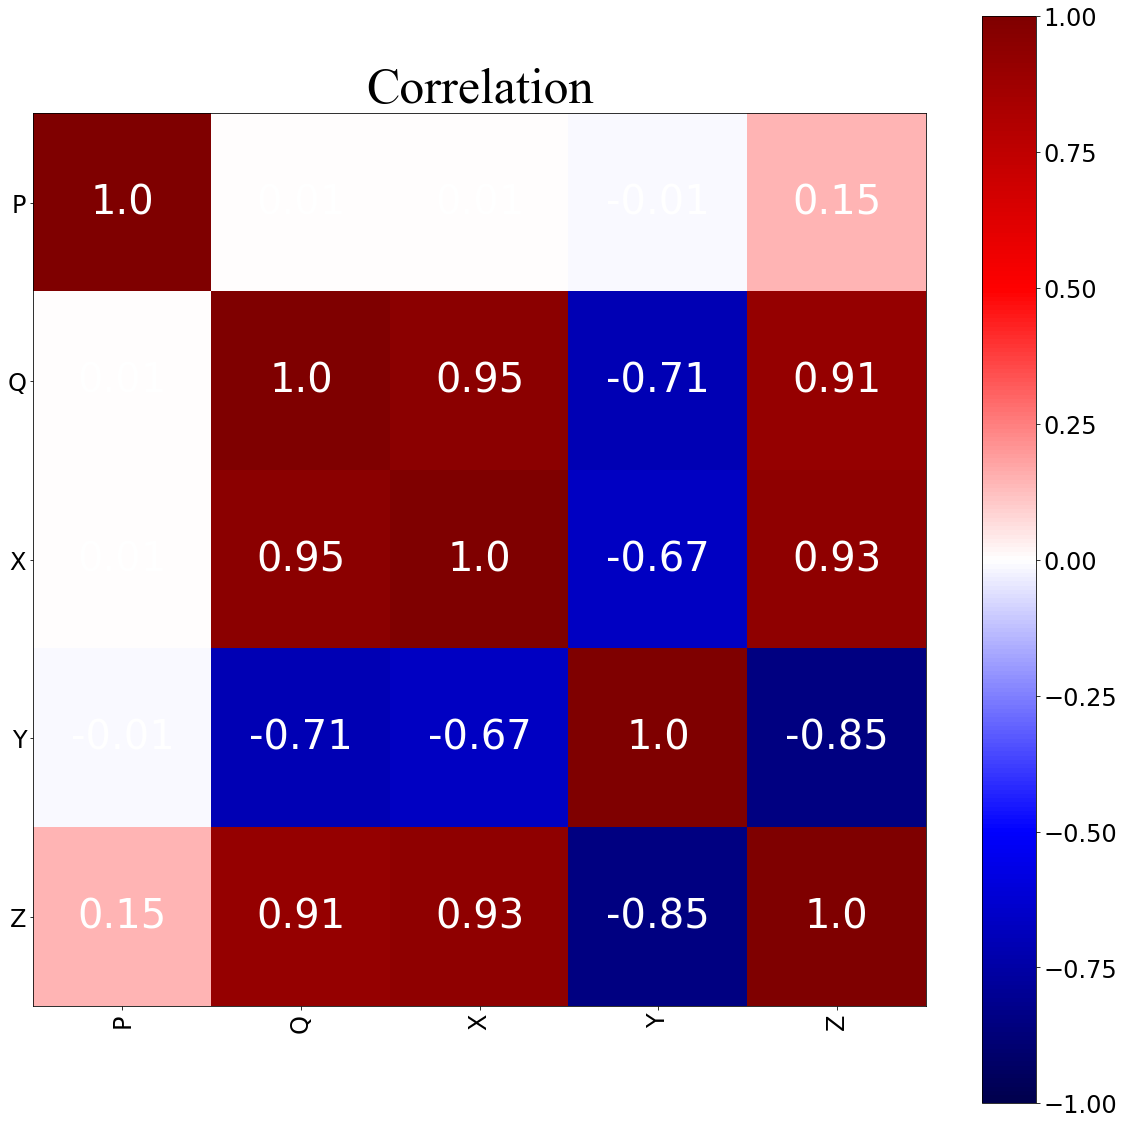

In [9]:
from datlib.plots import *
corr_matrix_heatmap(df.corr(),
                   save_fig = False,
                   pp = None,
                   title = "Correlation")

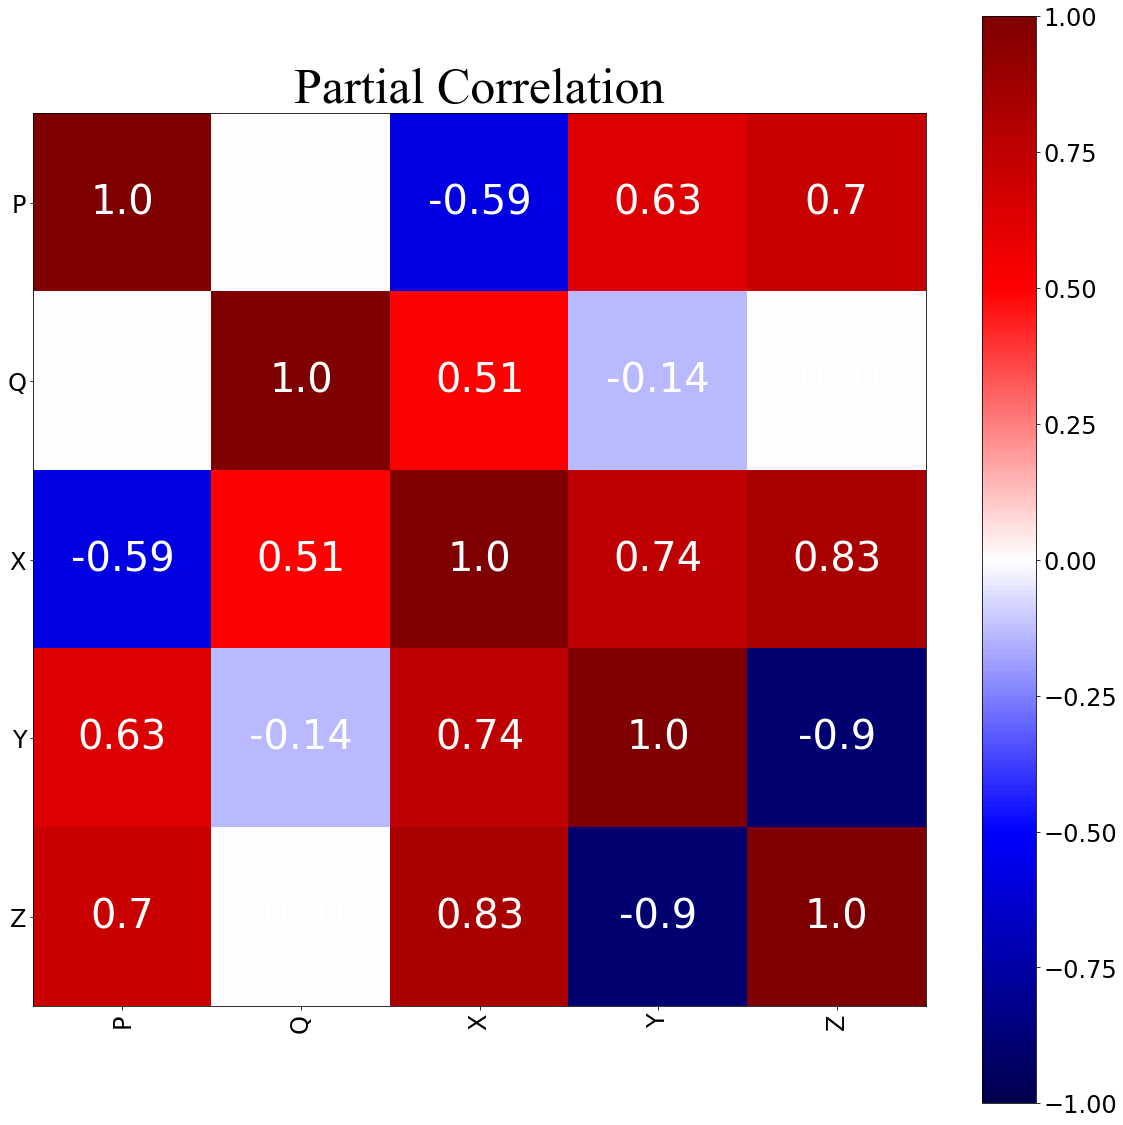

In [10]:
corr_matrix_heatmap(df.pcorr(),
                   save_fig = False,
                   pp = None,
                   title = "Partial Correlation")

In [11]:
pcorr_pvalues = {}

for y, Y in residuals.items():
    pcorr_pvalues[y] = {}
    for x, X in residuals.items():
        if x != y:
            # regress one residual on the other
            #  save the pvalue for the explanatory variable
            #  this is the pvalue of the partial correlation
            results = sm.OLS(Y, X).fit()
            pcorr_pvalues[y][x] = results.pvalues[x]
            print(results.summary())
        else:
            pcorr_pvalues[y][x] = np.NaN
            
pd.DataFrame(pcorr_pvalues).round(2)

                                 OLS Regression Results                                
Dep. Variable:                      P   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.5540
Date:                Thu, 04 Nov 2021   Prob (F-statistic):                       0.457
Time:                        10:21:25   Log-Likelihood:                     -1.9888e+05
No. Observations:              100000   AIC:                                  3.978e+05
Df Residuals:                   99999   BIC:                                  3.978e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

,P,Q,X,Y,Z
P,NaN,0.46,0.0,0.0,0.00
Q,0.46,NaN,0.0,0.0,0.03
X,0.00,0.00,NaN,0.0,0.00
Y,0.00,0.00,0.0,NaN,0.00
Z,0.00,0.03,0.0,0.0,NaN


In [12]:
undirected_graph = {key:[] for key in df.keys()}
for x in undirected_graph:
    undirected_graph[x] = [y for y in df.keys() if y != x]
undirected_graph

{'P': ['Q', 'X', 'Y', 'Z'],
 'Q': ['P', 'X', 'Y', 'Z'],
 'X': ['P', 'Q', 'Y', 'Z'],
 'Y': ['P', 'Q', 'X', 'Z'],
 'Z': ['P', 'Q', 'X', 'Y']}

In [13]:
import copy

In [14]:
p_val = .01
def build_skeleton(df, undirected_graph):
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used) :
        for c_var in control_vars:
            # set c_used every time use cycle through a new control
            #  the program will then iterate through remaining controls
            #  until statistical significance is broken
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:
                c_used.append(c_var)
                print(x,y, controls_used)
                test = df.partial_corr(x = x, y = y, covar=c_used,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val: 

                    undirected_graph[x].remove(y)
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)

                    # recursive function that iterates through remaining variables 
                    #  uses them as controls statistical significance holds without them,
                    #  otherwise break
                    check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)

    for x in df.keys():
        ys = undirected_graph[x]
        for y in df.keys():
            if x != y:
                test = df.partial_corr(x=x, 
                                       y=y, 
                                       covar = None,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
                else:
                    control_vars = [z for z in df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

build_skeleton(df, undirected_graph)

P Y []
P Z []
P Z ['Q']
P Z ['Q', 'X']
P Z ['Q']
P Z ['Q', 'Y']
P Z []
P Z ['X']
P Z ['X', 'Q']
P Z ['X']
P Z ['X', 'Y']
P Z []
P Z ['Y']
P Z ['Y', 'Q']
P Z ['Y']
P Z ['Y', 'X']
Q X []
Q X ['P']
Q X ['P', 'Y']
Q X ['P']
Q X ['P', 'Z']
Q X []
Q X ['Y']
Q X ['Y', 'P']
Q X ['Y']
Q X ['Y', 'Z']
Q X []
Q X ['Z']
Q X ['Z', 'P']
Q X ['Z']
Q X ['Z', 'Y']
Q Y []
Q Y ['P']
Q Y ['P', 'X']
Q Y ['P']
Q Y ['P', 'Z']
Q Y []
Q Y ['X']
Q Y ['X', 'P']
Q Y ['X']
Q Y ['X', 'Z']
Q Y []
Q Y ['Z']
Q Y ['Z', 'P']
Q Y ['Z']
Q Y ['Z', 'X']
Q Z []
Q Z ['P']
Q Z ['P', 'X']
X Q []
X Q ['P']
X Q ['P', 'Y']
X Q ['P']
X Q ['P', 'Z']
X Q []
X Q ['Y']
X Q ['Y', 'P']
X Q ['Y']
X Q ['Y', 'Z']
X Q []
X Q ['Z']
X Q ['Z', 'P']
X Q ['Z']
X Q ['Z', 'Y']
X Y []
X Y ['P']
X Z []
X Z ['P']
X Z ['P', 'Q']
X Z ['P']
X Z ['P', 'Y']
X Z []
X Z ['Q']
X Z ['Q', 'P']
X Z ['Q']
X Z ['Q', 'Y']
X Z []
X Z ['Y']
X Z ['Y', 'P']
X Z ['Y']
X Z ['Y', 'Q']
Y P []
Y Q []
Y Q ['P']
Y Q ['P', 'X']
Y Q ['P']
Y Q ['P', 'Z']
Y Q []
Y Q ['X']
Y Q ['X'

{'P': ['Z'],
 'Q': ['X', 'Y'],
 'X': ['Q', 'Z'],
 'Y': ['Q', 'Z'],
 'Z': ['P', 'X', 'Y']}

In [15]:
pip install pgmpy

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pgmpy

In [17]:
import matplotlib.pyplot as plt
import networkx as nx

def graph_DAG(undirected_graph, df, title = "DAG Structure"):
    pcorr_matrix = df.pcorr()
    graph= nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key, key2)
                edges.append(edge)
                edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2], 2))
    
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]
    
    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph, 
                     pos, 
                     node_color = color_map,
                     node_size=1000,
                    #show node label
                     with_labels = True,
                     arrows = False,
                     font_size = 20,
                     alpha = 1,
                     font_color = "white",
                     ax = ax)
    nx.draw_networkx_edge_labels(graph,
                                 pos,
                                edge_labels = edge_labels,
                                 font_color = "green",
                                 font_size=20)    
    
    plt.show()
    
#graph_DAG(undirected_graph, df)

In [18]:
from pgmpy.estimators import PC
c= PC(df)
max_cond_vars = len(df.keys()) - 2
model = c.estimate(return_type = "dag",
                  variant = "parallel", #"orig", "stable"
                  significance = p_val,
                  max_cond_vars = max_cond_vars,
                  ci_test = "pearsonr")
edges = model.edges()
edges

  0%|          | 0/3 [00:00<?, ?it/s]

OutEdgeView([('Y', 'Z'), ('P', 'Z'), ('X', 'Z'), ('Q', 'Y'), ('Q', 'X')])

In [19]:
from matplotlib.patches import ArrowStyle

def graph_DAG(edges, df, title=""):
    graph = nx.DiGraph()
    
    edge_labels = {}
    for edge in edges:
        controls = [key for key in df.keys() if key not in edge]
        control = list(set(controls))
        keep_controls = []
        for control in controls:
            control_edges = [ctrl_edge for ctrl_edge in edges if control == ctrl_edge[0]]
            if (control, edge[1]) in control_edges:
                print("keep control:", control)
                keep_controls.append(control)
        print(edge, keep_controls)
        # build pcorr matrix with nodes from the edge + controls
        pcorr = df[[edge[0], edge[1]]+keep_controls].pcorr().round(2)
        edge_labels[edge] = str(pcorr.loc[edge[1], edge[0]])
    
    graph.add_edges_from(edges)
    color_map = ["C0" for g in graph]
    
    fig, ax = plt.subplots(figsize = (20,12))
    graph.nodes()
    plt.tight_layout()
    pos = nx.spring_layout(graph)
    plt.title(title, fontsize = 30)
    nx.draw_networkx(graph,
                    pos,
                    node_color = color_map,
                    node_size = 1200,
                    font_color = "white",
                    font_size = 26,
                    alpha = 1,
                    width = 1,
                    edge_color = "C1",
                    arrowstyle = ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width = .1"))
    
    nx.draw_networkx_edge_labels(graph,
                                pos,
                                edge_labels = edge_labels,
                                font_color = "green",
                                font_size = 20)
    
    plt.show()
#graph_DAG(edges, df, title = "Directed Acyclic Graph")